In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
import warnings
warnings.filterwarnings('ignore')

if not os.path.abspath(os.pardir) in sys.path:
    sys.path.append(os.path.abspath(os.pardir))

from src.config import *

### Load Modeling Logs

In [6]:
model_logs = pd.read_csv(MODELS_PATH + MODELS_LOG_FNAME )
model_logs.sort_values('f1_score', ascending = False).head(10)

,experiment_name,model_name,f1_score,precision,recall,conf_matrix
52,hp_tune,"CatBoostClassifier(iterations=2486,learning_ra...",0.602899,0.500000,0.759124,[[18507 624]\n [ 198 624]]
18,baselines,"CatBoostClassifier(iterations=1500,silent=True...",0.583971,0.468085,0.776119,[[18566 650]\n [ 165 572]]
16,baselines,"CatBoostClassifier(iterations=500,silent=True,...",0.582822,0.466448,0.776567,[[18567 652]\n [ 164 570]]
19,baselines,"CatBoostClassifier(iterations=2000,silent=True...",0.581800,0.465630,0.775204,[[18566 653]\n [ 165 569]]
17,baselines,"CatBoostClassifier(iterations=1000,silent=True...",0.579028,0.463175,0.772169,[[18564 656]\n [ 167 566]]
23,feats_eng,"CatBoostClassifier(iterations=1000,silent=True...",0.578086,0.467147,0.758127,[[18519 665]\n [ 186 583]]
27,feats_sel_top300,"CatBoostClassifier(iterations=1000,silent=True...",0.577095,0.466346,0.756827,[[18518 666]\n [ 187 582]]
31,feats_sel_top200,"CatBoostClassifier(iterations=1000,silent=True...",0.574724,0.459135,0.768097,[[18532 675]\n [ 173 573]]
35,feats_sel_top100,"CatBoostClassifier(iterations=1000,silent=True...",0.548502,0.432692,0.748960,[[18524 708]\n [ 181 540]]
24,feats_sel_top300,"LogisticRegression(C=0.1,class_weight=balanced...",0.433463,0.892628,0.286228,[[15927 134]\n [ 2778 1114]]


### Check Baselines Performances (for model cards)

In [24]:
# new column, model type
model_logs['model_type'] = model_logs.model_name.apply(lambda x:x.split('(')[0])
# filter for baselines experiment, only keep best model for each type based on F1 score
bl_top = model_logs[model_logs.experiment_name == 'baselines'].sort_values('f1_score', ascending = False).drop_duplicates(subset = 'model_type')

for idx, line in bl_top.iterrows():

    print('Model', line.model_type)
    print('F1', line.f1_score)
    print('Precision', line.precision)
    print('Recall', line.recall)
    #print(line.to_dict())
    cm = np.array(eval(line.conf_matrix.replace('[  ', '[').replace('  ', ',').replace('\n', ',')))
    sum = np.sum(cm)
    print(np.round(cm/sum, 2))
    print()

Model CatBoostClassifier
F1 0.5839714139867279
Precision 0.4680851063829787
Recall 0.7761194029850746
[[0.93 0.03]
 [0.01 0.03]]

Model LogisticRegression
F1 0.4274240940254652
Precision 0.8927986906710311
Recall 0.2809683234612413
[[0.8  0.01]
 [0.14 0.05]]

Model DecisionTreeClassifier
F1 0.413490321293155
Precision 0.8477905073649754
Recall 0.2734230667722354
[[0.8  0.01]
 [0.14 0.05]]

Model RandomForestClassifier
F1 0.2023121387283237
Precision 0.1145662847790507
Recall 0.8641975308641975
[[0.94 0.05]
 [0.   0.01]]



### Check if features selection brings any benefits

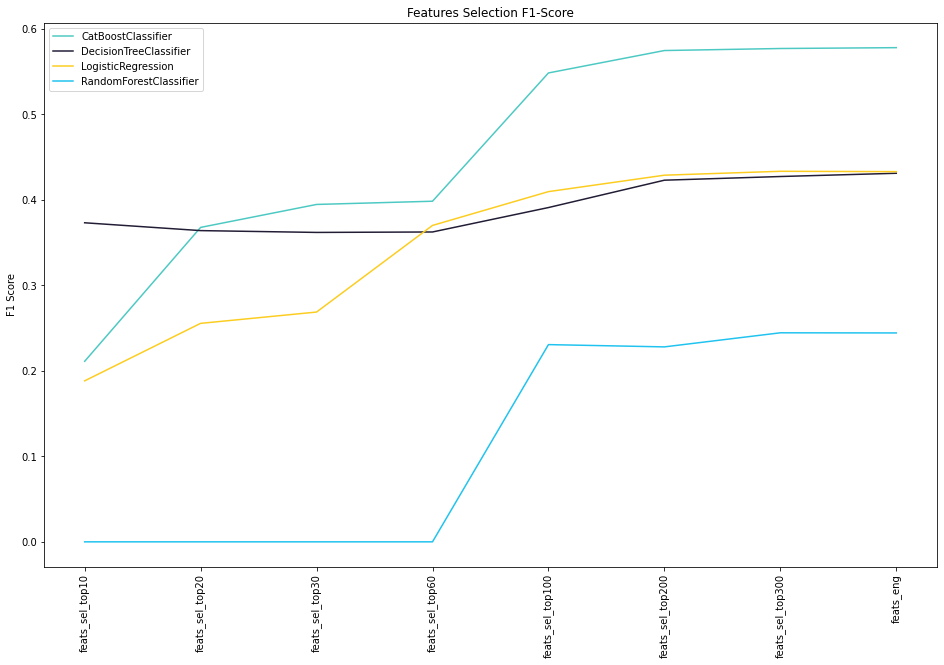

In [25]:
df  = model_logs[model_logs.experiment_name.isin(['feats_sel_top300', 'feats_sel_top200', 'feats_sel_top100',
                   'feats_sel_top60', 'feats_sel_top30', 'feats_sel_top20', 'feats_sel_top10', 'feats_eng'])][['model_name', 'experiment_name', 'f1_score']]

plt.figure(figsize=(16, 10))
i = 0
for model, sdf in df.groupby('model_name'):

    sdf['top'] = sdf.experiment_name.apply(lambda x:int(x.split('top')[1]) if ('top' in x) else (500))
    sdf = sdf.sort_values(by = 'top')

    plt.plot(sdf.experiment_name, sdf['f1_score'], label = model.split('(')[0], c = COLORS[i])
    plt.legend()
    plt.xticks(rotation = 90)
    i += 1

plt.ylabel('F1 Score')
plt.title('Features Selection F1-Score')
plt.show()